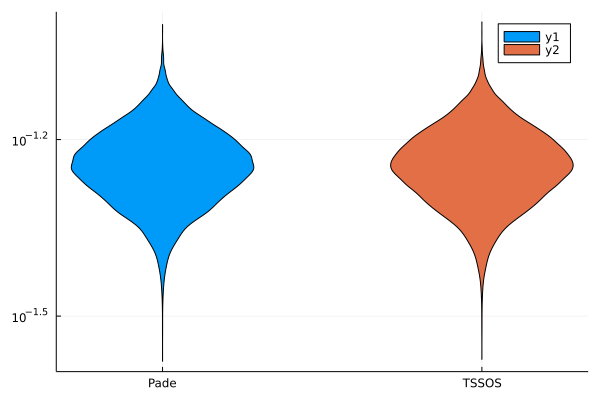

In [13]:
using HDF5
using StatsPlots

pade_file_name = "lindblad_pop_sid_vs_noise_3methods_combined.hdf5"
tssos_file_name = "opts2022-05-29_00-10-10.hdf5"

function get_noise_levels(file_name)
    h5open(file_name, "r") do file
        return keys(file)
    end
end

noise_levels = get_noise_levels(pade_file_name)

function read_obj_o3_subs_exact_w_seed(file_name, w)
    h5open(file_name, "r") do file
    return read(file[w]["seed"]), read(file[w]["obj_o3_subs_exact"])
    end
end

function get_best_opts_w_seed(file_name, w)
    h5open(file_name, "r") do file
       return keys(file[string(w)]), [read(file[string(w)][string(seed)]["best_opt"]) for seed in keys(file[string(w)])]     
    end
end

w = "0.05"
obj_seeds, objs = read_obj_o3_subs_exact_w_seed(pade_file_name, w)
opt_seeds, opts = get_best_opts_w_seed(tssos_file_name, w)

# [ read_obj_o3_subs_exact(file_name, w) for w in noise_levels]
        
violin(["Pade" "TSSOS"], [objs, opts],  yaxis=:log)

In [18]:
using DataFrames

objs_df = DataFrame(zip(obj_seeds, objs))
rename!(objs_df, [:seed,:tss])
opts_df = DataFrame(zip(opt_seeds, opts))
rename!(opts_df, [:seed,:pade])

#innerjoin(objs_df, opts_df, on = :seed)

,seed,pade
,String,Float64
1,1000923797,0.0654454
2,1001008430,0.0605663
3,1001165252,0.0518847
4,1001170376,0.047569
5,1001173185,0.0641724
6,100139632,0.0578148
7,1001402855,0.0591473
8,1001691713,0.0631793
9,1001715003,0.0579564


In [8]:
objs_df = DataFrame(zip(obj_seeds, objs))
rename!(objs_df, [:seed,:tss])

,1,2
,UInt32,Float64
1,3727193955,1.79535e-9
2,688944997,1.50907e-7
3,1364227942,1.785e-7
4,4004935526,1.39925e-6
5,262174568,2.98282e-7
6,3103160173,5.69123e-8
7,1340110701,3.7571e-6
8,2201253743,4.39478e-8
9,3975051120,1.46096e-6


In [19]:
innerjoin(objs_df, opts_df, on = :seed)

,seed,tss,pade
,UInt32,Float64,Float64


In [20]:
outerjoin(objs_df, opts_df, on = :seed)

,seed,tss,pade
,Any,Float64?,Float64?
1,2009791902,0.0374462,missing
2,1126497697,0.0516898,missing
3,855702952,0.0602139,missing
4,2222652846,0.0538121,missing
5,2367094200,0.056815,missing
6,3341483455,0.0705403,missing
7,1543568832,0.0720644,missing
8,1796275650,0.0582416,missing
9,2625043910,0.0592492,missing
